In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [3]:
fpn_csv = 'cluster_images_new_b.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [4]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [5]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,238,Juan de Flandes,The Ascension,representation,Prado Museum,12,0,1,"1, oil on pine panel",110 x 84 cm,...,2,0,0,0,4,0,0,3,5,"bottom of (cutoff) figure going into cloud, pe..."
1,239,Lucas Cranach the Elder,CacerÐ_a en el castillo de Torgau en honor de...,representation,Prado Museum,5,0,1,"1, oil on panel",118 x 177 cm,...,1,0,0,1,4,0,0,5,5,"stags in river, antlers, archers behind trees,..."
2,226,Pieter Bruegel â°Ð«ÐThe Elderâ°Ð«Ñ,The Wine of Saint Martin's Day,representation,Prado Museum,20,0,1,"1, glue-size on twill",148 x 271 cm,...,0,0,0,1,3,0,3,3,5,grouping of figures on top of red container re...
3,240,El Greco (Domenikos Theotokopoulos),The Vision of Saint John,representation,Met Museum,19,0,1,"1, oil on canvas",225 x 199 cm,...,3,2,3,1,4,0,0,5,5,"elongated figure w/ arms in air, gesture, spec..."
4,227,Herman Van Vollenhoven,Still Life with Game Fowl,representation,Prado Museum,20,0,1,"1, oil on panel",26 x 36 cm,...,2,1,0,4,2,0,3,3,5,"dead birds, sideways & upside down, may not be..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [6]:
X = data[['primary_medium', 'co', 'te', 'va', 'sh']]

In [7]:
X.head()

,primary_medium,co,te,va,sh
0,1,0,0,2,4
1,1,0,0,1,4
2,1,0,0,0,3
3,1,3,2,3,4
4,1,0,1,2,2


# KMeans

In [8]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

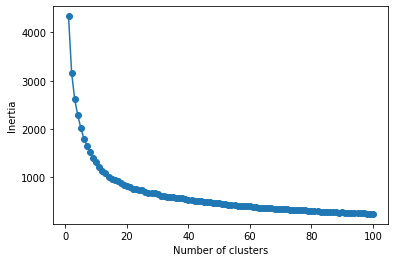

In [9]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [10]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [4, 8, 12, 15, 20]

For n_clusters = 4 The average silhouette_score is : 0.24365784663074458


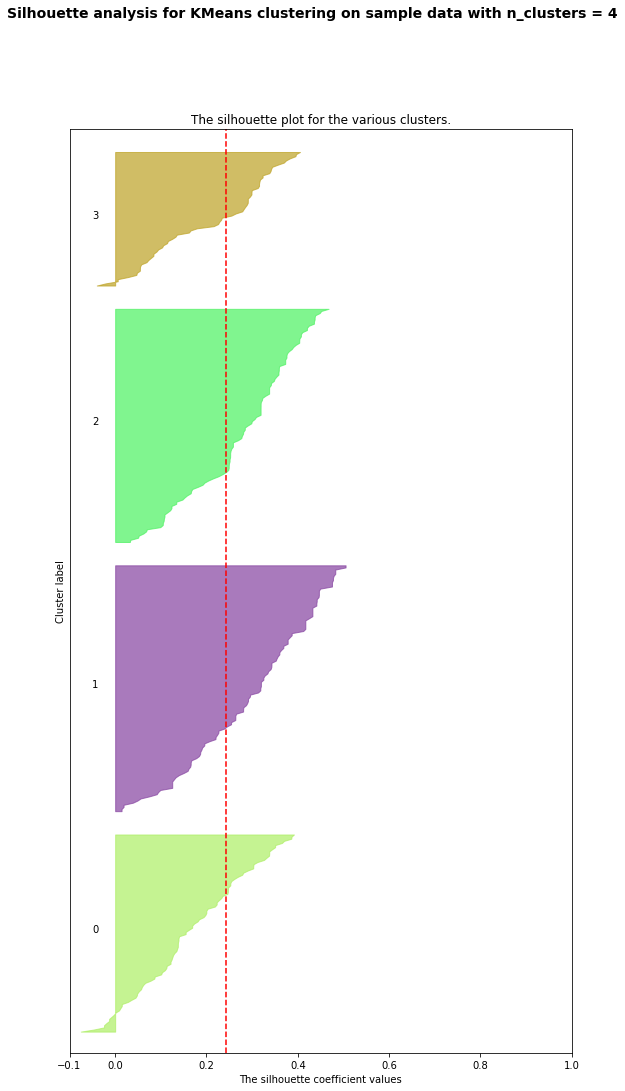

For n_clusters = 8 The average silhouette_score is : 0.24406586293676696


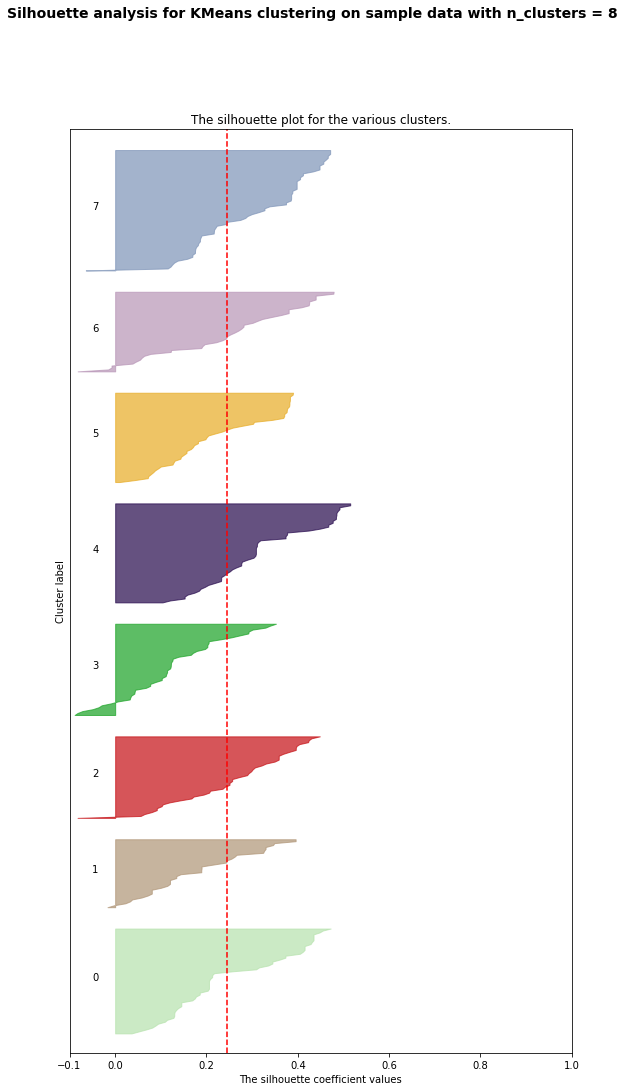

For n_clusters = 12 The average silhouette_score is : 0.2628999335004868


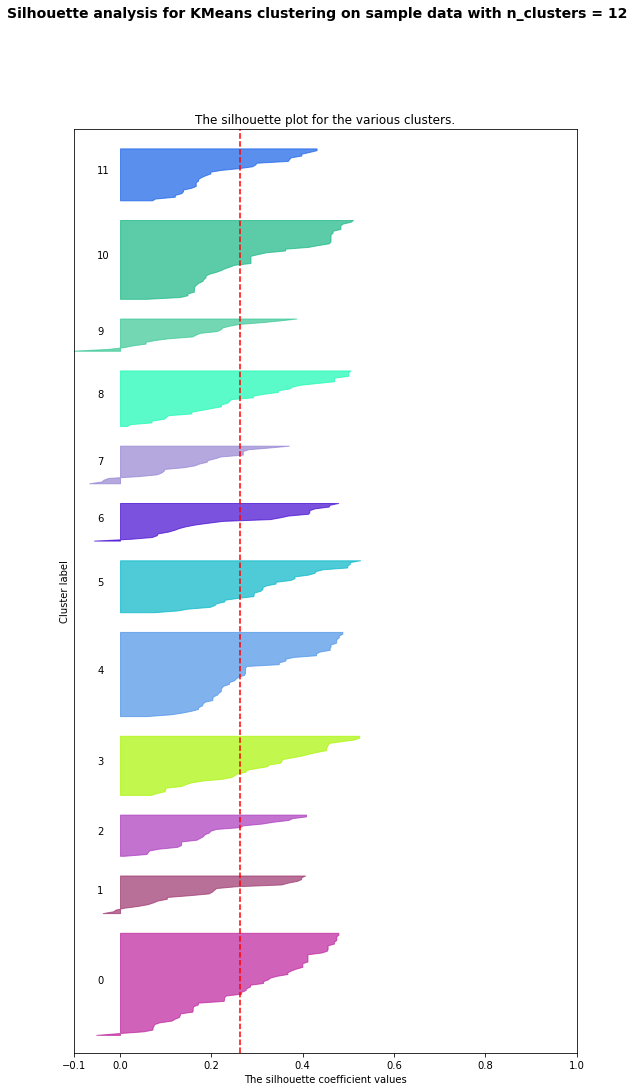

For n_clusters = 15 The average silhouette_score is : 0.2605424971746113


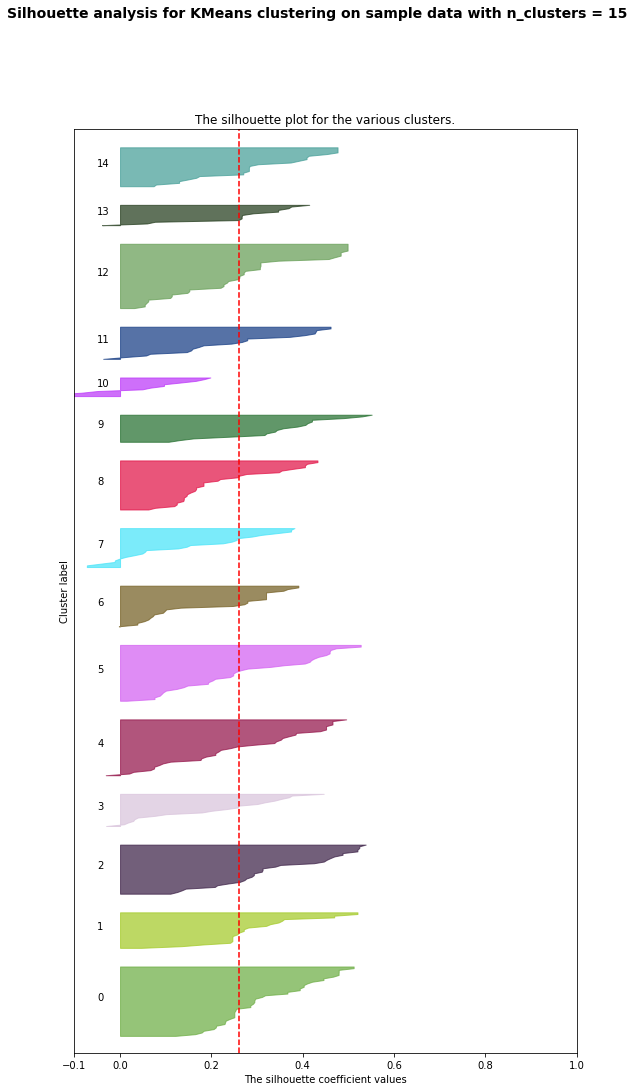

For n_clusters = 20 The average silhouette_score is : 0.2460993246831902


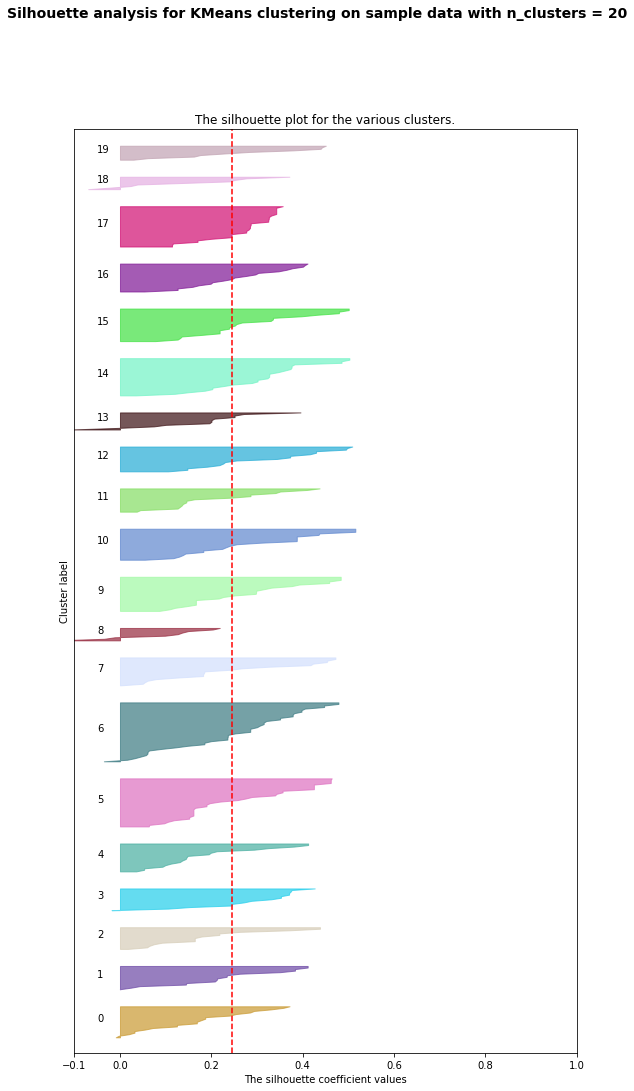

In [11]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [160]:
# set the number of clusters in the final model
my_n_clusters = 4

In [161]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [162]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
11_small.jpg
16_small.jpg
17_small.jpg
18_small.jpg
19_small.jpg
30_small.jpg
40_small.jpg
41_small.jpg
42_small.jpg
45_small.jpg
47_small.jpg
48_small.jpg
50_small.jpg
53_small.jpg
54_small.jpg
55_small.jpg
56_small.jpg
57_small.jpg
58_small.jpg
59_small.jpg
61_small.jpg
62_small.jpg
65_small.jpg
67_small.jpg
68_small.jpg
71_small.jpg
72_small.jpg
73_small.jpg
74_small.jpg
76_small.jpg
78_small.jpg
82_small.jpg
84_small.jpg
85_small.jpg
86_small.jpg
88_small.jpg
89_small.jpg
90_small.jpg
92_small.jpg
93_small.jpg
94_small.jpg
95_small.jpg
105_small.jpg
107_small.jpg
109_small.jpg
110_small.jpg
111_small.jpg
112_small.jpg
115_small.jpg
117_small.jpg
118_small.jpg
121_small.jpg
123_small.jpg
126_small.jpg
128_small.jpg
131_small.jpg
134_small.jpg
135_small.jpg
138_small.jpg
141_small.jpg
143_small.jpg
144_small.jpg
145_small.jpg
147_small.jpg
1

In [163]:
raw_body_html = ""
toc = ""
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("<h2 id='" + str(i) + "'>Images in cluster: " + str(i) + "</h2>")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    toc += "<li><a href='#" + str(i) + "'>Cluster" + str(i) + "</a></li>"
    raw_body_html += "<h2 id='" + str(i) + "'><span class='back'><a href='#toc'>Back to the top</a></span><br>Images in cluster: " + str(i) + "</h2>"
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')
            raw_body_html += "<img src='img_small/" + str(j+2) + '_small.jpg' + "'>"


print(raw_body_html)
import webbrowser

f = open('result.html','w')

html = "<html><head><link rel='stylesheet' type='text/css' href='style.css'></head><body><div id='toc'><ul>"+toc+"<ul></div><div id='clusters'>"+raw_body_html+"</div><script src='script.js'></script></body></html>"

f.write(html)
f.close()

#Change path to reflect file location
filename = 'result.html'
webbrowser.open_new_tab(filename)

# print(html)

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<h2 id='0'>Images in cluster: 0</h2>
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
11_small.jpg
16_small.jpg
17_small.jpg
18_small.jpg
19_small.jpg
30_small.jpg
40_small.jpg
41_small.jpg
42_small.jpg
45_small.jpg
47_small.jpg
48_small.jpg
50_small.jpg
53_small.jpg
54_small.jpg
55_small.jpg
56_small.jpg
57_small.jpg
58_small.jpg
59_small.jpg
61_small.jpg
62_small.jpg
65_small.jpg
67_small.jpg
68_small.jpg
71_small.jpg
72_small.jpg
73_small.jpg
74_small.jpg
76_small.jpg
78_small.jpg
82_small.jpg
84_small.jpg
85_small.jpg
86_small.jpg
88_small.jpg
89_small.jpg
90_small.jpg
92_small.jpg
93_small.jpg
94_small.jpg
95_small.jpg
105_small.jpg
107_small.jpg
109_small.jpg
110_small.jpg
111_small.jpg
112_small.jpg
115_small.jpg
117_small.jpg
118_small.jpg
121_small.jpg
123_small.jpg
126_small.jpg
128_small.jpg
131_small.jpg
134_small.jpg
135_small.jpg
138_small.jpg
141_small.jpg
143_small.jpg
144_small.jpg
145_small.jpg

True